**Случайный лес. Модель - классификатор.**

In [36]:
#@title Импорт всех необходимых библиотек
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

## Объяснение всех шагов для обучения модели - классификатора

In [37]:
dataset = pd.read_csv("https://raw.githubusercontent.com/ShauryaBhandari/Machine-Learning/master/Random%20Forest/bill_authentication.csv")
print (dataset.head())

   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


 **Загрузим**:

*      в перменную `X` данные, по которым будет происходить классификация 

*      в переменную `y` - фичи, которые будем предсказывать






In [38]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

Разделим наши данные на обучающую и тестируемую выборки:

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
#@title  Центрируем данные по `X` (совсем не обязательно)

# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

1.   Создадим лес из 20 деревьев и установим единый ГСЧ. 
2.   Обучим модель и протестируем её.

In [41]:
classifier = RandomForestClassifier(n_estimators=20, random_state=1,max_depth=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Обзор эффективности созданной модели:

In [42]:
print('Точность предсказываний = {0} или {1}%'.format(accuracy_score(y_pred, y_test),round(accuracy_score(y_pred, y_test),3)*100))

Точность предсказываний = 0.9672727272727273 или 96.7%


In [43]:
#@title Установки для визуализации дерева
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call

from matplotlib import rcParams
import seaborn as sb

rcParams['figure.figsize'] = 25,18


Мы видим, как одно из деревьев решений из нашего леса классифицирует различные данные.


*   Последовательное разделение идёт по фиче, снижающей неопределенность максимальным образом 
*   Неопределённость тем больше, чем `gini` ближе к единице.
При gini=0 - мы одноначно может предсказать исследуемую переменную

|

[Text(878.3333333333333, 896.94, 'Skewness <= 4.998\ngini = 0.493\nsamples = 690\nvalue = [613, 484]\nclass = C'),
 Text(568.3333333333333, 733.86, 'Curtosis <= -0.284\ngini = 0.476\nsamples = 460\nvalue = [288, 451]\nclass = l'),
 Text(335.8333333333333, 570.78, 'Entropy <= 0.992\ngini = 0.078\nsamples = 127\nvalue = [8, 190]\nclass = l'),
 Text(206.66666666666666, 407.69999999999993, 'Skewness <= 3.894\ngini = 0.05\nsamples = 123\nvalue = [5, 188]\nclass = l'),
 Text(103.33333333333333, 244.62, 'Variance <= 3.299\ngini = 0.012\nsamples = 103\nvalue = [1, 161]\nclass = l'),
 Text(51.666666666666664, 81.53999999999996, 'gini = 0.0\nsamples = 102\nvalue = [0, 161]\nclass = l'),
 Text(155.0, 81.53999999999996, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = C'),
 Text(310.0, 244.62, 'Entropy <= -1.931\ngini = 0.225\nsamples = 20\nvalue = [4, 27]\nclass = l'),
 Text(258.3333333333333, 81.53999999999996, 'gini = 0.0\nsamples = 17\nvalue = [0, 27]\nclass = l'),
 Text(361.66666666666663, 8

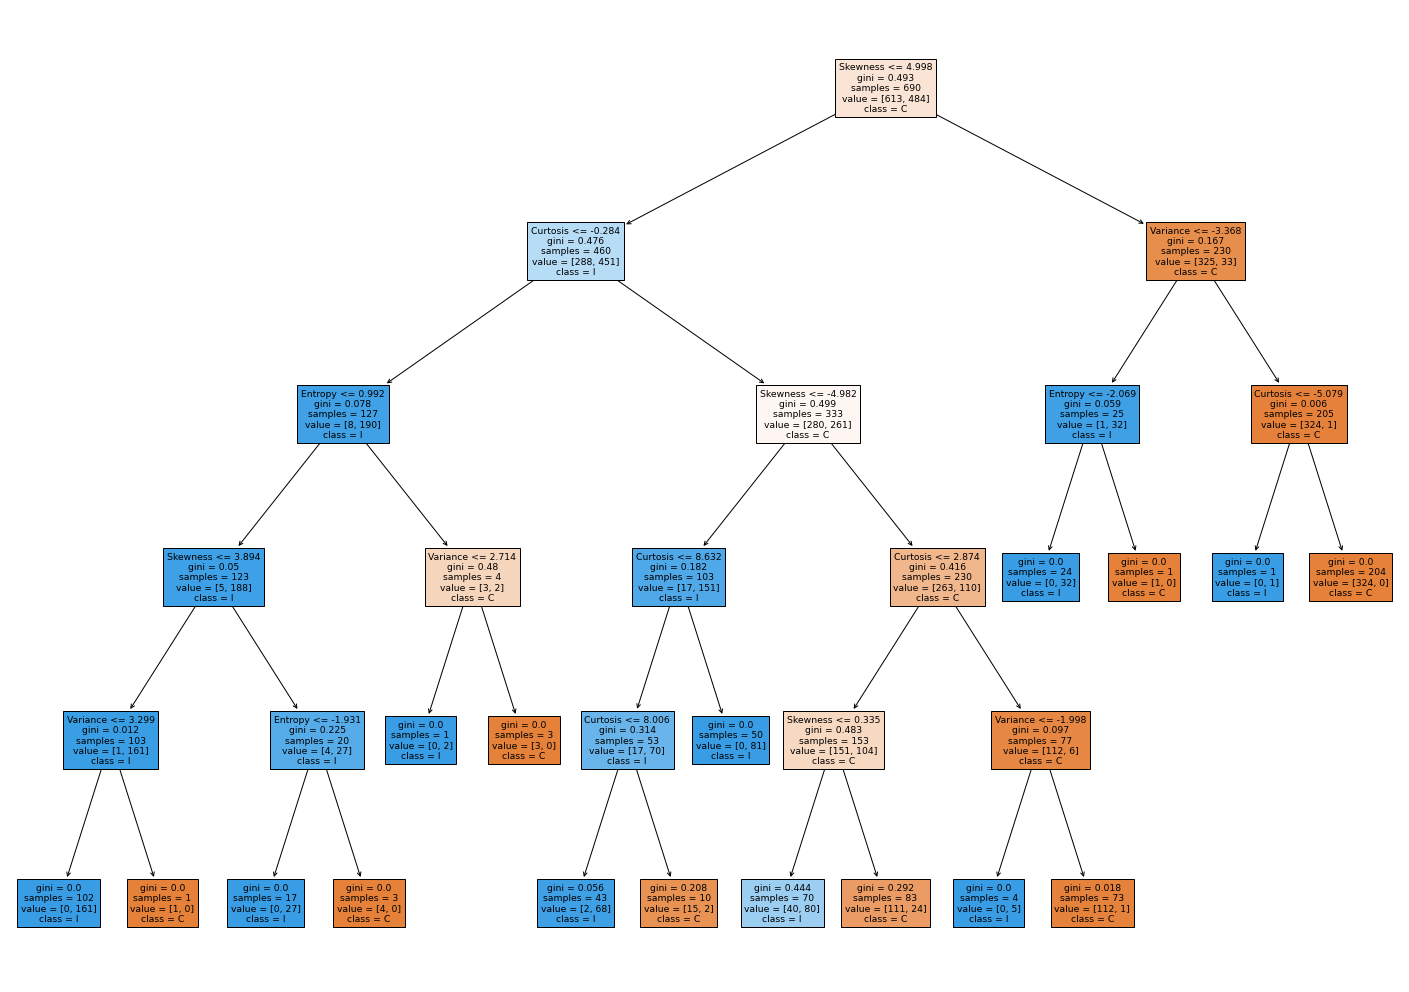

In [44]:
estimator = classifier.estimators_[5]
tree.plot_tree(estimator, filled=True,precision=3, feature_names=list(dataset.columns)[:-1] ,class_names=list(dataset.columns)[-1])


Визуализируем важность фич (переменных):

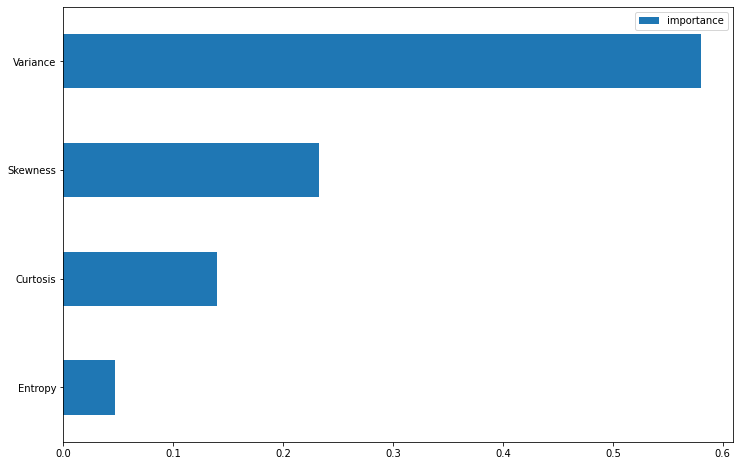

In [10]:
imp = pd.DataFrame(classifier.feature_importances_, index=list(dataset.columns)[:-1], columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

Мы видим, что эффективность обученной модели методом случайного леса равняется практически 99%

# Создадим функцию, возвращающую новую модель, обученную методом случайного леса

Параметры:


*   `df` - таблица с данными для обучения модели
*   `name_pred` - название столбца, который мы хотим предсказывать
*   `n_est` - количество деревьев в ансамбле

Возврат:



*   Обученный классификатор
* массив` из 2х значений:  реальная классификация, предсказанная





In [11]:
#@title Функция для создания нового классификатора
def random_tree_clfr(dataset:pd.DataFrame, name_pred, n_est:int):
  # X = dataset.drop(name_pred, axis=1, inplace=False) 
  # X  = dataset.drop(name_pred, axis=1)
  X = dataset.drop(name_pred, 1)
  y = dataset[name_pred]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  classifier = RandomForestClassifier(n_estimators=n_est, random_state=0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  return classifier,[y_test,y_pred]

# Протестируем нашу функцию обучения для модели




Подготовим новые данные для создания модели


In [12]:
from sklearn import datasets
import pandas as pd

#Load dataset
iris = datasets.load_iris()
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
print(data.head())
print(data.dtypes)


   sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
species           int64
dtype: object


Проверим функцию построения модели и посмотрим на её эффективность 

In [13]:
classifer,y_test_train = random_tree_clfr(data,'species',20)
print('Точность предсказываний = {0} или {1}%'.format(accuracy_score(y_test_train[0], y_test_train[1]),round(accuracy_score(y_test_train[0], y_test_train[1]),3)*100))

# print(classification_report(y_test_train[0],y_test_train[1]))

Точность предсказываний = 0.9666666666666667 или 96.7%


Визуализация нашей модели:

[Text(474.30000000000007, 697.62, 'petal width <= -0.624\ngini = 0.66\nsamples = 75\nvalue = [48, 37, 35]\nclass = s'),
 Text(379.44000000000005, 570.78, 'gini = 0.0\nsamples = 29\nvalue = [48, 0, 0]\nclass = s'),
 Text(569.1600000000001, 570.78, 'petal width <= 0.671\ngini = 0.5\nsamples = 46\nvalue = [0, 37, 35]\nclass = p'),
 Text(379.44000000000005, 443.94, 'sepal length <= 1.44\ngini = 0.142\nsamples = 26\nvalue = [0, 36, 3]\nclass = p'),
 Text(284.58000000000004, 317.1, 'sepal width <= -1.868\ngini = 0.1\nsamples = 25\nvalue = [0, 36, 2]\nclass = p'),
 Text(189.72000000000003, 190.26, 'sepal length <= 0.259\ngini = 0.5\nsamples = 2\nvalue = [0, 2, 2]\nclass = p'),
 Text(94.86000000000001, 63.42000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 2]\nclass = e'),
 Text(284.58000000000004, 63.42000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 2, 0]\nclass = p'),
 Text(379.44000000000005, 190.26, 'gini = 0.0\nsamples = 23\nvalue = [0, 34, 0]\nclass = p'),
 Text(474.300000000000

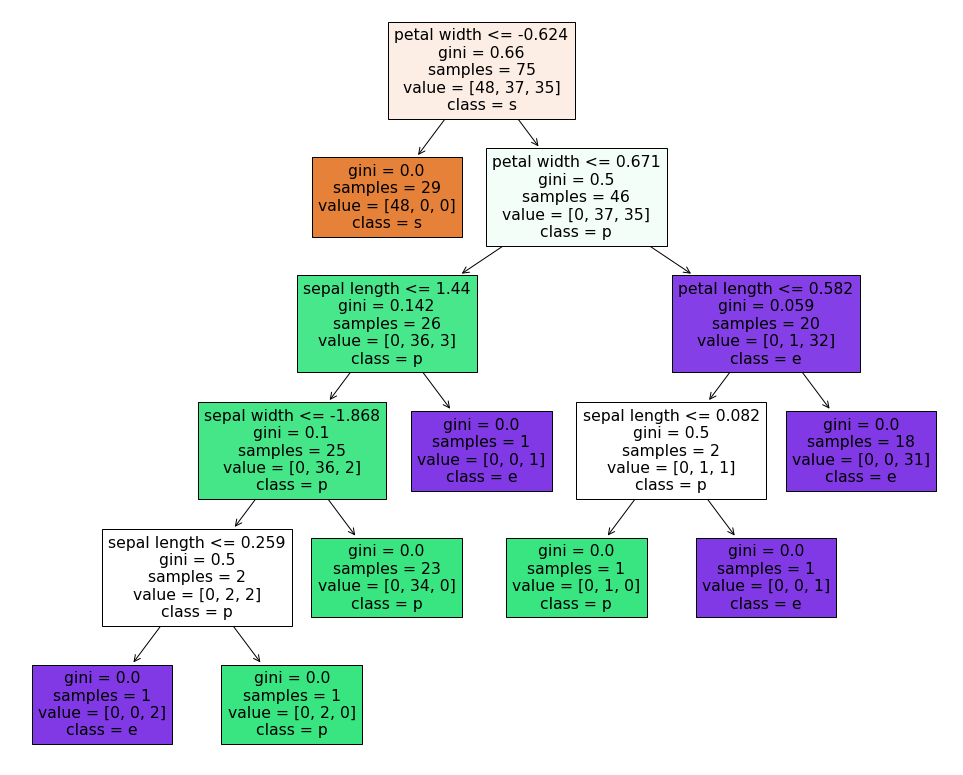

In [14]:
# Модель (также доступно единственное дерево решений)
from sklearn.ensemble import RandomForestClassifier


 # Извлечь дерево решений
estimator = classifer.estimators_[5]
tree.plot_tree(estimator, filled=True,precision=3, feature_names=list(data.columns)[:-1] ,class_names=list(data.columns)[-1])




*   Последовательное разделение идёт по фиче, снижающей неопределенность максимальным образом 
*   Неопределённость тем больше, чем 'gini' ближе к единице.
При gini=0 - мы одноначно может предсказать исследуемую переменную



Важность фич:

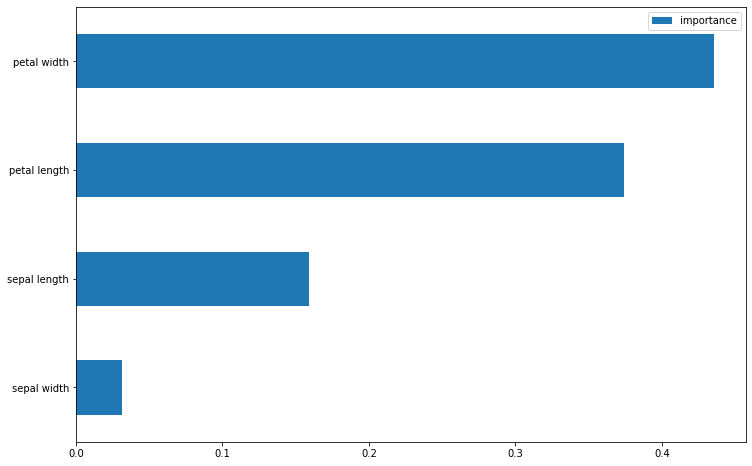

In [15]:
imp = pd.DataFrame(classifer.feature_importances_, index=list(data.columns)[:-1], columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

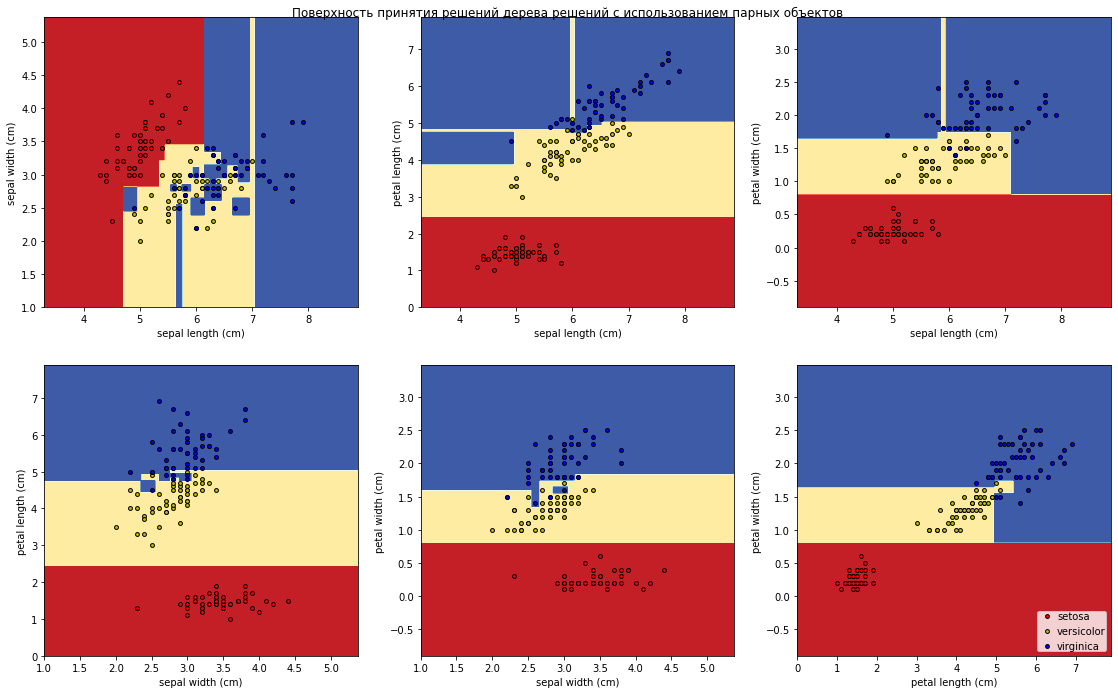

In [45]:
#@title Визуальное представление классификаторов (не леса - обычных деревьев в пространстве 2х фич) на основе классического датасета видов "ириса Фишера"
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()
plt.figure(figsize=(16, 10)) 

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # Мы берем только две соответствующие фИЧИ
    X = iris.data[:, pair]
    y = iris.target

    # обучение
    clf = DecisionTreeClassifier().fit(X, y)

    # Построим границу принятия решений
    plt.subplot(2, 3, pairidx + 1,)
    plt.subplots_adjust(wspace=5, hspace=5)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Нанесём на график тренировочные точки
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
        

plt.suptitle("Поверхность принятия решений дерева решений с использованием парных объектов")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
# plt.axis("tight")

# plt.figure(figsize=(18,12), dpi=80)
# clf = DecisionTreeClassifier().fit(iris.data, iris.target)
# plot_tree(clf, filled=True,impurity=True)
# plt.show()

# Случайный лес - регрессионная модель

Непосредственно обучение модели состоит всего из 2х строчек, что не скажем о подготовке данных. 


---


В силу того, что подготовка данных практически совпадает для обучения разных моделей - выделим это в отдельную функцию
(На самом деле препроцессинг данных намного сложнее и зачастую состоит из сотен строк, но мы подобрали уже готовые для обучения данные, т.к. наша цель состоит в *демонстрации возможностей случайного леса*)

In [17]:
#@title Функция для подготовки данных для обучения

def prepare_data(dataset:pd.DataFrame,name_pred):
  X = dataset.drop(name_pred, 1)
  y = dataset[name_pred]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=0)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return (X_train, X_test, y_train, y_test)

Подготовим данные для обучения и тестирования модели

In [18]:
dataset = pd.read_csv('https://raw.githubusercontent.com/ShauryaBhandari/Machine-Learning/master/Random%20Forest/petrol_consumption.csv')
X_train, X_test, y_train, y_test = prepare_data(dataset,'Petrol_Consumption')
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


Создадим регрессор и обучим его

In [19]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [20]:
y_pred = regressor.predict(X_test)
print('Средняя абсолютная ошибка регрессии:', metrics.mean_absolute_error(y_test, y_pred))
print('Среднеквадратичная ошибка регрессии:', metrics.mean_squared_error(y_test, y_pred))
print('Корневая средняя ошибка регрессии:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Средняя абсолютная ошибка регрессии: 58.25833333333333
Среднеквадратичная ошибка регрессии: 4823.389166666667
Корневая средняя ошибка регрессии: 69.45062394728119


Визуализируем 

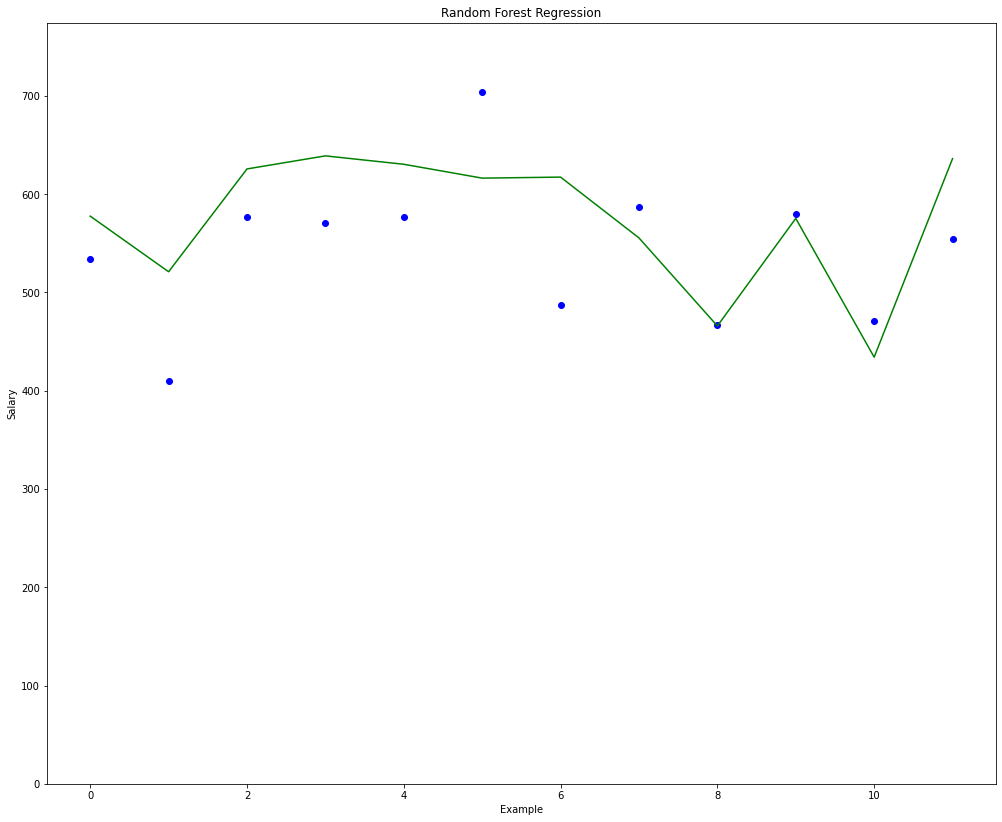

In [21]:
#@title Визуализируем на тестовой выборке. Линия - предсказанные значения, точки - реальные.
# Визуализация результатов регрессии случайных лесов
X_grid = np.arange(0, y_test.size, 1)
  
# reshape для преобразования данных в массив len (X_grid) * 1,
# т.е. сделать столбец из значения X_grid
X_grid = X_grid.reshape((len(X_grid), 1))

  
# Точечная диаграмма для исходных данных
plt.scatter(X_grid, y_test, color = 'blue')  

  
# график прогнозируемых данных
plt.plot(X_grid, regressor.predict(X_test), 
         color = 'green') 

plt.title('Random Forest Regression')
plt.xlabel('Example')
plt.ylabel('Salary')
plt.ylim([0,y_test.max()*1.1])

plt.show()

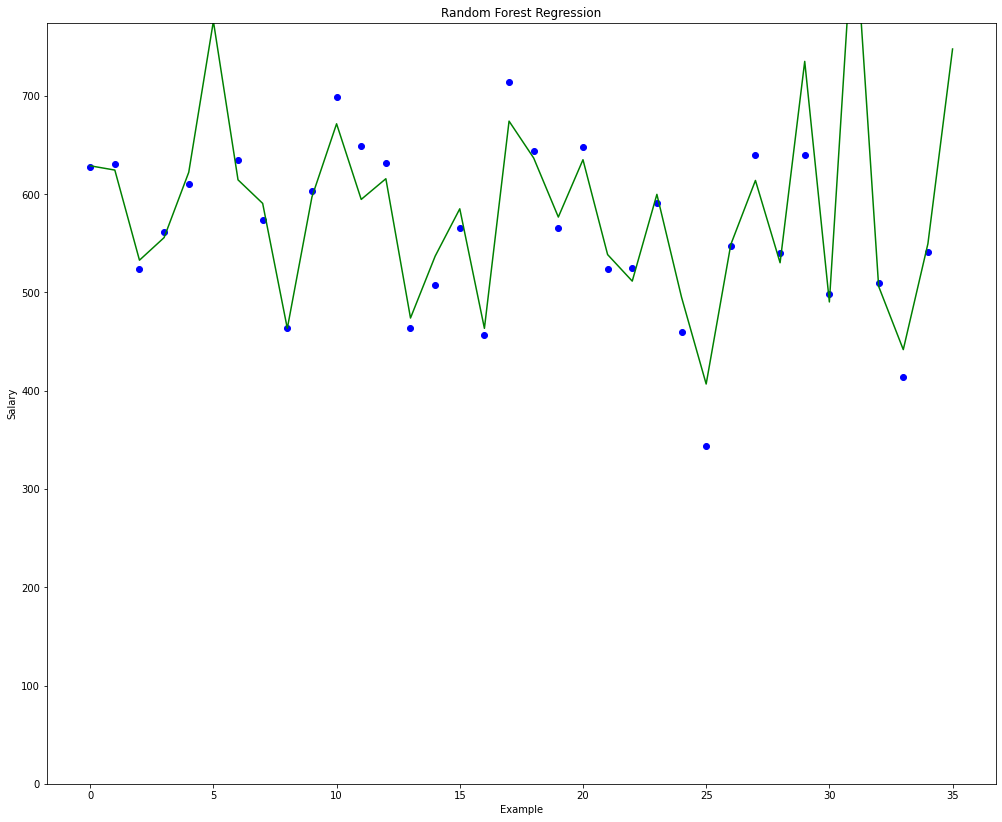

In [22]:
#@title Визуализируем на всей выборке (тренировочной в том числе). Линия - предсказанные значения, точки - реальные.

X_grid = np.arange(0, y_train.size, 1)

X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_grid, y_train, color = 'blue')  

  
# график прогнозируемых данных
plt.plot(X_grid, regressor.predict(X_train), 
         color = 'green') 

plt.title('Random Forest Regression')
plt.xlabel('Example')
plt.ylabel('Salary')
plt.ylim([0,y_test.max()*1.1])

plt.show()

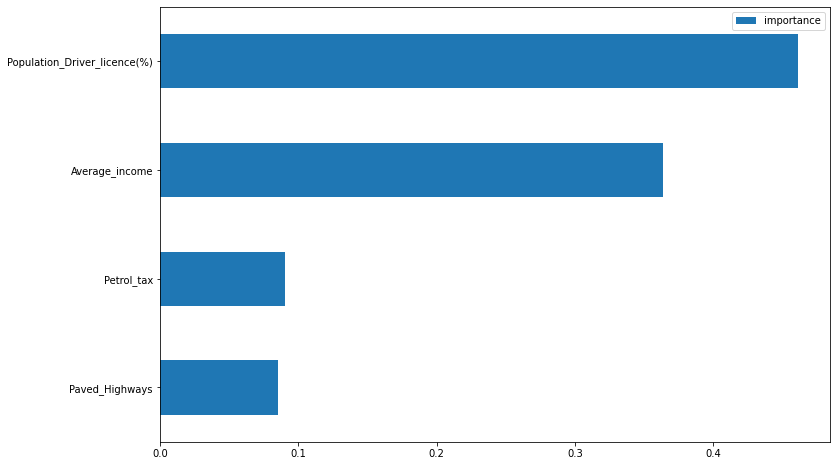

In [23]:
imp = pd.DataFrame(regressor.feature_importances_, index=list(dataset.columns)[:-1], columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))